# HY2: Environmental Kuznets Curve

**Hypothesis:** GDP and pollution follow an inverted-U curve
- Early: GDP ↑ → Pollution ↑
- Later: GDP ↑ → Pollution ↓


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

%matplotlib inline

In [11]:
# Load data
df = pd.read_csv('../cleaned_data/analysis_ready.csv')
df = df[['gdp_per_capita', 'mean_value_PM25']].dropna()

X = df['gdp_per_capita'].values.reshape(-1, 1)
y = df['mean_value_PM25'].values

print(f"Data points: {len(df)}")

Data points: 699


In [12]:
# Linear model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear = linear_model.predict(X)
r2_linear = r2_score(y, y_linear)

# Quadratic model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
quad_model = LinearRegression()
quad_model.fit(X_poly, y)
y_quad = quad_model.predict(X_poly)
r2_quad = r2_score(y, y_quad)

print(f"Linear R²: {r2_linear:.4f}")
print(f"Quadratic R²: {r2_quad:.4f}")

# Check for inverted-U
x2_coef = quad_model.coef_[2]
print(f"\nX² coefficient: {x2_coef:.6f}")
if x2_coef < 0:
    print("✓ Inverted-U curve confirmed (EKC exists)")
else:
    print("✗ Not an inverted-U")

Linear R²: 0.2198
Quadratic R²: 0.3122

X² coefficient: 0.000000
✗ Not an inverted-U


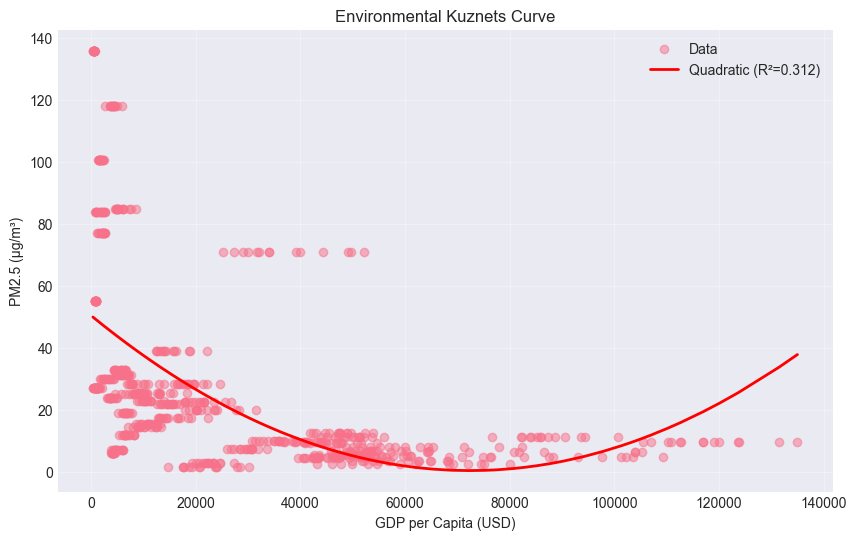

In [15]:
# Visualization
sort_idx = np.argsort(X.flatten())
X_sorted = X[sort_idx]
y_quad_sorted = y_quad[sort_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X_sorted, y_quad_sorted, 'r-', linewidth=2, label=f'Quadratic (R²={r2_quad:.3f})')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Environmental Kuznets Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../visualizations/HY2_ekc.png', dpi=300, bbox_inches='tight')
plt.show()